In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from fbprophet import Prophet
from matplotlib.pyplot import figure

#Additional Resource https://nextjournal.com/eric-brown/forecasting-with-prophet-part-4 

In [ ]:
uploaded = files.upload()

Btc = pd.read_csv('Cleaned_Price.csv')

Saving Cleaned_Price.csv to Cleaned_Price.csv


In [ ]:
Btc.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,Year,Month
count,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2721.000000,2721.000000
mean,1360.000000,11390.914284,11696.114806,11052.436301,11402.876574,1.473499e+10,2017.929438,6.578831
std,785.629366,16149.953466,16581.711792,15649.920510,16152.314650,2.000117e+10,2.172561,3.530088
min,0.000000,176.897003,211.731003,171.509995,178.102997,5.914570e+06,2014.000000,1.000000
25%,680.000000,607.005005,609.734985,604.606995,606.973022,8.026580e+07,2016.000000,3.000000
50%,1360.000000,6330.770020,6446.259766,6236.470215,6329.950195,5.127130e+09,2018.000000,7.000000
75%,2040.000000,10535.492188,10798.729492,10234.576172,10549.329102,2.460973e+10,2020.000000,10.000000
max,2720.000000,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,2022.000000,12.000000


In [ ]:
# Select only the important features i.e. the date and price
Btc = Btc[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
Btc = Btc.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
Btc.head(5)

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [ ]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(Btc) # fit the model using all data

<Figure size 8400x4200 with 0 Axes>

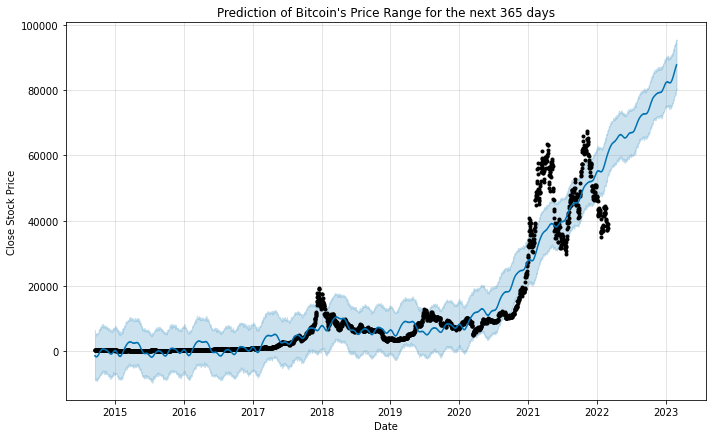

In [ ]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
plt.figure(figsize = (30, 15), dpi = 280)
m.plot(prediction)
plt.title("Prediction of Bitcoin's Price Range for the next 365 days")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()